# Library

In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

import torchvision.utils as utils
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Set torch basic

In [2]:
# CUDA Check
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Set dtype
dtype = torch.double

# Load the data

In [3]:
mnist_train = datasets.MNIST(
    root='data/',
    train=True,
    download=True)

mnist_test = datasets.MNIST(
    root='data/',
    train=False,
    download=True)


print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test


# Analyze MNIST data

Train data shape :  torch.Size([60000, 28, 28])
Train label shape :  torch.Size([60000])
Test data shape :  torch.Size([10000, 28, 28])
Test label shape :  torch.Size([10000])


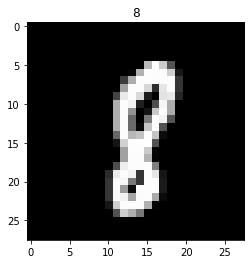

8's image data

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0, 184, 253, 204,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,  

In [6]:
# Rename tensors
X_train = mnist_train.data # images
y_train = mnist_train.targets # labels
X_test = mnist_test.data
y_test = mnist_test.targets

# Check the shape of data and labels
print("Train data shape : ", X_train.shape)
print("Train label shape : ", y_train.shape)
print("Test data shape : ", X_test.shape)
print("Test label shape : ", y_test.shape)

# Show a image example
# Generate random number
idx = np.random.randint(0, X_train.size(0))

# Show the image with label as title
# Warning? : imshow uses numpy object basically
plt.figure()
plt.imshow(X_train[idx], cmap="gray")
plt.title(str(y_train[idx].numpy()))
plt.show()

# Show image with computer's perspective
print(str(y_train[idx].numpy()) + "'s image data\n")
print(X_train[idx])

# Convert data to double cuda tensor
X_train = X_train.to(dtype=dtype, device=device)
y_train = y_train.to(device=device)
X_test = X_test.to(dtype=dtype, device=device)
y_test = y_test.to(device=device)

# Data vectorization and normalization

In [8]:
# DO NOT EXECUTE THIS CELL REPEATEDLY! UNEXPECTED RESULTS CAN BE SHOWN!
# Calculate vector size
def calculate_vector_size(data_shape): # (28, 28) -> 784
    # Calculate vector size from data shape
    
    # Arguments
    # data_size : shape of the data
    
    size = 1
    for s in data_shape:
        size *= s
    
    return size

# Normalize with minimax normalizer
def normalize(data, min_value, max_value):
    # Minimax normalizer
    
    # Arguments
    # data : Image data
    # min_value : The lowest value in the data
    # max_value : The largest value in the data
    
    normalized_data = (data - min_value) / (max_value - min_value)
    
    return normalized_data

# Check data shape
shape = X_train.shape[1:] # 0 index is number of data
print("Data shape : ", shape)

# Vectorize the data
X_train = X_train.view(-1, calculate_vector_size(shape)) # Vectorize the X_train
X_test = X_test.view(-1, calculate_vector_size(shape))# Vectorize the X_test
print(X_train.size())
print(X_test.size())

# Normalized the data
# Each pixel has 0 ~ 255 value for their intensivity
X_train = normalize(X_train, 0, 255) # Normalize the X_train data
X_test = normalize(X_test, 0, 255) # Normalize the X_test data

# Check changes on data
idx = np.random.randint(0, y_train.shape[0])
print(str(idx + 1) + "th data in X_train\n", X_train[idx])

Data shape :  torch.Size([784])
torch.Size([60000, 784])
torch.Size([10000, 784])
42936th data in X_train
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.000

# How to make one-hot vector

In [11]:
# Generate 10 x 10 identity matrix
print("10 x 10 identity matrix \n", torch.eye(10))

# Sparse label
sparse_label = torch.tensor([1, 3, 5, 7, 9])
print("Sparse label \n", sparse_label)

# Sparse label -> one-hot vector
print("One-hot vector \n", torch.eye(10)[sparse_label]) # Output is double tensor

# Simple method
print("One-hot vector (Simple version) \n", torch.nn.functional.one_hot(sparse_label)) # Output is long tensor

# Change mnist dataset's label to one hot vector without torch.nn.functional and set the dtype and device

y_train_one_hot = torch.eye(10)[y_train].to(dtype=dtype, device=device)
y_test_one_hot = torch.eye(10)[y_test].to(dtype=dtype, device=device)

# Check the changes
print("train label one hot vector's shape : ", y_train_one_hot.shape)
idx = np.random.randint(0, y_train.shape[0])
print("train one hot vector example, " + str(idx) + "th label")
print(y_train_one_hot[idx])

print("test label one hot vector's shape : ", y_test_one_hot.shape)
idx = np.random.randint(0, y_test.shape[0])
print("test one hot vector example, " + str(idx) + "th label")
print(y_test_one_hot[idx])


10 x 10 identity matrix 
 tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
Sparse label 
 tensor([1, 3, 5, 7, 9])
One-hot vector 
 tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
One-hot vector (Simple version) 
 tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 

# Set hyperparameters

In [12]:
learning_rate = 0.3
training_epochs = 100
display_step = 10

# Data dimension
D_in =  calculate_vector_size(shape) # Data input's dimension
D_out = 10 # Data output's dimemsion - One-hot vector

# Construct the model
## Cross Entropy Loss

In [13]:
# Construct the model
class LogisticModel(torch.nn.Module):
    def __init__(self, D_in, D_out):
        super(LogisticModel, self).__init__()
        # Initialize model weights
        
        # Arguments
        # D_in : Input dimension of the model
        # D_out : Output dimension of the model
        
        # Hint
        # torch.nn.Softmax(dim)
        # Reference : https://pytorch.org/docs/stable/nn.html?highlight=torch.nn.softmax#torch.nn.Softmax
        
        self.linear = torch.nn.Linear(in_features=D_in, out_features=D_out)
        self.softmax = torch.nn.Softmax(dim=1)
    
    def forward(self, x):
        # Calculate the model outputs
        
        # Arguments
        # x : Input of the model (vectorized data)
        
        output = self.linear(x)
        output = self.softmax(output)
        
        return output
    
# Define the loss using one-hot vector
class Cross_Entropy_Loss(torch.nn.Module):
    def __init__(self):
        super(Cross_Entropy_Loss, self).__init__()
    def forward(self, y_pred, y):
        # Loss for each example
        loss = torch.sum(-1 * y * torch.log(y_pred), axis=1)

        # Mean the loss of each example
        loss = torch.mean(loss)

        return loss
    
# Make the model
model = LogisticModel(D_in, D_out).to(dtype=dtype, device=device)

# Set the loss function as Cross_Entropy_Loss
criterion = Cross_Entropy_Loss()

# Set the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model

In [16]:
losses = []

print("Training...")

for epoch in range(training_epochs):
    # Initialize the optimizer
    optimizer.zero_grad()
    
    # Compute Forward process and calculate the loss
    output = model(X_train)
    loss = criterion(output, y_train_one_hot)

    # Record the loss
    losses.append(loss.item())
    
    # Display the loss
    if (epoch + 1) % display_step == 0:
        print("epoch ", epoch + 1, "\t loss : ", losses[-1])
    
    # Compute backward process and update weights
    loss.backward()
    optimizer.step()
    
print("Finish training")

Training...
epoch  10 	 loss :  1.0319121577127495
epoch  20 	 loss :  0.7511135198759621
epoch  30 	 loss :  0.6390395732304093
epoch  40 	 loss :  0.5766996866681102
epoch  50 	 loss :  0.5361313040701295
epoch  60 	 loss :  0.5071995140261247
epoch  70 	 loss :  0.4852900673496074
epoch  80 	 loss :  0.46798092037001715
epoch  90 	 loss :  0.45386962606932824
epoch  100 	 loss :  0.4420834015073565
Finish training


# Plot the loss

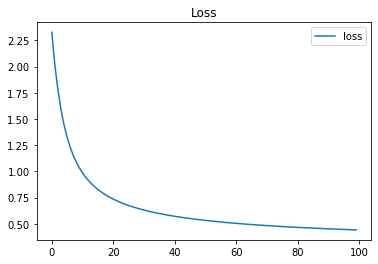

In [17]:
plt.figure()
plt.plot(losses, label="loss")
plt.title("Loss")
plt.legend()
plt.show()

# Check the accuracy

In [ ]:
with torch.no_grad():
    test_corrects = 0
    test_total = 0
    
    # Compute the forward process
    
    # Get predicted labels from outputs
    # Hint : torch.max or torch.argmax
    
    # Check the number of correct labels and total label
    
    # Show the accuracy
    print("Test accuracy : ", (test_corrects / test_total) * 100, "%")

# Confusion matrix

In [ ]:
# confusion_matrix's input is numpy object!
from sklearn.metrics import confusion_matrix

with torch.no_grad():
    # Calculate the outputs and extract labels from that
    # Fill the code
    
    print("Predicted label results")
    print(y_test_pred)
    print("Target label results")
    print(y_test)
    
    print("Confusion matrix result")
    print(confusion_matrix(y_test.cpu().numpy(), y_test_pred.cpu().numpy()))

# Prediction examples

In [ ]:
# Show 10 prediction examples
with torch.no_grad():
    for i in range(10):
        # Make random index of test data
        
        # Make a prediction
        
        # Show a image
        _, (ax1, ax2) = plt.subplots(1, 2)
        
        # On left side, we show the random image
        
        # On right side, we show the model's probability prediction
        
        plt.show()
        
        # Show the predicted label and true label
        print("Predicted label : ", predictions.item())
        print("True label : ", y_test[idx].item())

# Simpler implementation (with torch.nn.CrossEntropyLoss())

In [ ]:
# Construct the model with torch.nn.Sequential

# Set the loss function with torch.nn.CrossEntropyLoss((log)Softmax + NLLLoss)
# Reference : https://pytorch.org/docs/stable/nn.html?highlight=torch.nn.crossentropyloss#torch.nn.CrossEntropyLoss

# Set optimizer to gradient descent optimizer


losses = []

print("Training...")

for epoch in range(training_epochs):
    # Initialize the optimizer
    
    # Compute Forward process and calculate the loss

    # Record the loss
    
    # Display the loss
    
    # Compute backward process and update weights
    
print("Finish training")

# Plot the loss (Review)

In [ ]:
plt.figure()
plt.plot(losses, label="loss")
plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
# Check the accuracy
